In [1]:
%reset
import numpy as np
import numpy.linalg as npl
from  matplotlib.gridspec import GridSpec
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import sympy
from sympy import *
from IPython.core.interactiveshell import InteractiveShell
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import make_blobs
from sklearn.neighbors import KernelDensity
import itertools as it
import seaborn as sns
import scipy
from scipy import stats
from scipy.stats import gaussian_kde
from scipy.stats import multivariate_normal
# import matplotlib.gridspec as gridspec 
from matplotlib import cm
import math
from scipy.integrate import trapz

from matplotlib import gridspec


Nothing done.


In [2]:
InteractiveShell.ast_node_interactivity = "all"
plt.rcParams[ "figure.figsize" ] = (10,10)
origin2D = np.vstack([0,0])
origin3D = np.vstack([0,0,0])
scale = 10

# Chapter 06, Probability and Distributions
## 6.1 Construction of a Probability Space
1. Random variable, $X$: 
    1. In the same way that we might want to assign a singular summary value for a matrix, such as the sum of the diagonal values as trace or the area of vectors in parallelogram form as determinant, in linear algebra; in probability we might want to assign a real number to represent some random process such as weather patterns or coin tosses or die rolls. A random variable is an assignment or mapping or quantification of results from a random process to $\mathbb{R}$. For example, a variable assigned to either 0 or 1 based on the flip of a coin is considered a random variable, as is the sum of 5 die rolls. 
    1. In other words, a random variable is a numerical representation of some aspect of an event. If die are rolled, a random variable might be the maximum roll. 
    1. Additionally, if the column space, range, or potential output values, of a random variable, are not infinite, that is, they are countable, and the probability of each value is nonnegative, this random variable is also a discrete random variable. That is, a random variable is discrete if it is countable and nonnegative.
1. Sample space $\Omega$.
    1. Set of *all* possible outcomes of an experiment.
1. Event space $A$. 
    1. The space of potential results of the experiment. 
1. Probability $P$.
    1. P(A) is a measure of the probability that an event will occur.
1. Target space $T$.
    1. Quantities of interest in the present context. 
    1. E.g. Tossing 2 coins and counting heads, T = {0, 1, 2}, that is, there can be 0, 1, or 2 heads.
1. Some subset of our target, $S$, usually to be plugged into $X$.
#### Figure 6.1 
*Book provides mind map of concepts.*
### Example 6.1

In [3]:
d = Symbol('d')
p = Symbol('p')
options = [d,p]
omega = list(it.product(options,repeat=2))
omega

[(d, d), (d, p), (p, d), (p, p)]

In [4]:
X = [(i).count(d) for i in omega]
T = np.unique(X)
X
T

[2, 1, 1, 0]

array([0, 1, 2])

The probability mass function determines the probability of every outcome in our random variable X. If we are given the information that the probability of drawing a `d` is `0.3`, we can proceed as the following.

In [5]:
pd = .3
pnd = 1-pd

omegaP = np.vstack([[pd if i == d else pnd for i in np.vstack(omega)[:,0]],[pd if i == d else pnd for i in np.vstack(omega)[:,1]]]).T
omegaP = [i[0]*i[1] for i in omegaP]
omegaP = np.vstack([X,omegaP]).T
omegaP

array([[2.  , 0.09],
       [1.  , 0.21],
       [1.  , 0.21],
       [0.  , 0.49]])

In [6]:
P = lambda x: [i for i in omegaP if x == i[0]] # PMF. For any input value, find probability in event space table.
Ss = T[::-1]
[sum(i)[1] for i in [P(i) for i in Ss]] # Check all values in our target space.

[0.09, 0.42, 0.48999999999999994]

##### 6.1.3 Statistics
*Machine learning is close to statistics in its goal to construct a model that adequately represents the process that generated the data.*

## 6.2 Discrete and Continuous Probabilities

### Example 6.2
#### Figure 6.2

In [7]:
ys = np.linspace(1,3,3)
xs = np.linspace(1,5,5)
xy = np.vstack([(x,y) for x in xs for y in ys])
Matrix(xy[:5])
eventCount = 100
events = xy[np.random.choice(len(xy),100)]
Matrix(events[:5])

Matrix([
[1.0, 1.0],
[1.0, 2.0],
[1.0, 3.0],
[2.0, 1.0],
[2.0, 2.0]])

Matrix([
[4.0, 2.0],
[3.0, 1.0],
[2.0, 1.0],
[5.0, 1.0],
[1.0, 2.0]])

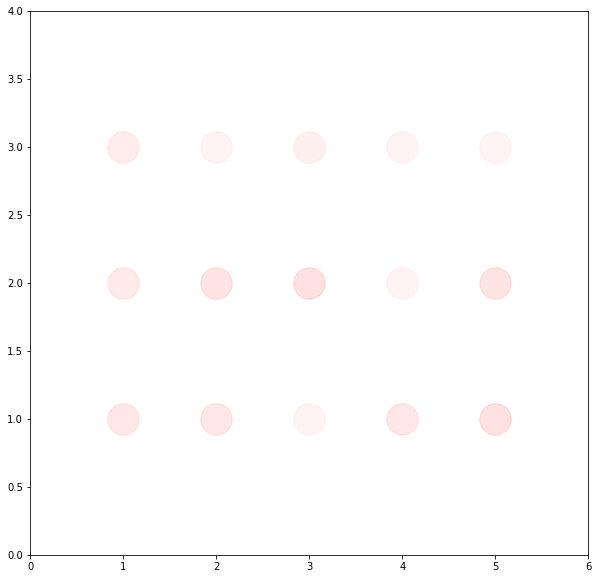

In [8]:
plt.scatter(events[:,0], events[:,1] ,s=1000, alpha = 1/eventCount, c = "r")
plt.axis([0,6,0,4]); 

The above represents two random variables, along each axis, and 5 and 3 events that could happen. The joint probability of one event happening, would be the coordinate e.g. 1 for point (4,2) divided by the total number of events (15).

In [9]:
Xevents = np.vstack(np.unique(events[:,0],return_counts=True)).T
Yevents = np.vstack(np.unique(events[:,1],return_counts=True)).T
Xevents = np.hstack([Xevents,np.vstack([i/sum(Xevents[:,1]) for i in Xevents[:,1]])])
Yevents = np.hstack([Yevents,np.vstack([i/sum(Yevents[:,1]) for i in Yevents[:,1]])])
Matrix(Xevents)
Matrix(Yevents)

Matrix([
[1.0, 21.0, 0.21],
[2.0, 21.0, 0.21],
[3.0, 19.0, 0.19],
[4.0, 16.0, 0.16],
[5.0, 23.0, 0.23]])

Matrix([
[1.0, 38.0, 0.38],
[2.0, 39.0, 0.39],
[3.0, 23.0, 0.23]])

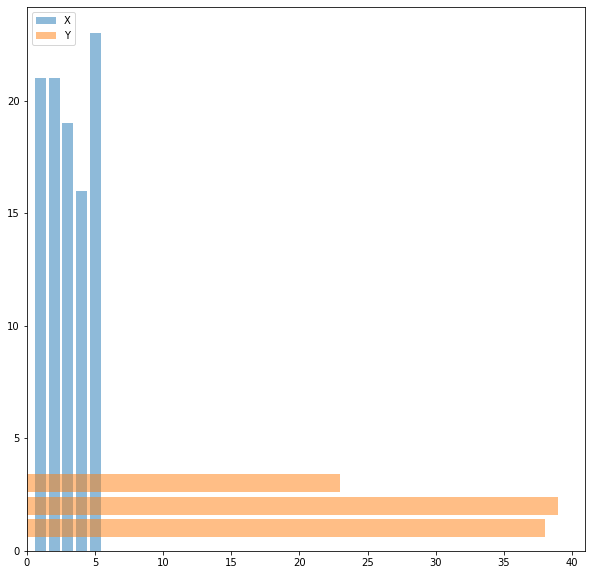

In [10]:
plt.bar(Xevents[:,0],Xevents[:,1],alpha=.5,label = "X")
plt.barh(Yevents[:,0],Yevents[:,1],alpha=.5,label = "Y")
# plt.axis([0,10,0,10])
plt.legend(loc=2);

*The conditional probabiltiy is the fraction of a row or column in a particular cell.* 

In [11]:
n = np.random.choice(len(events),1)
n

array([79])

In [12]:
testEvent = events[n]
testEvent

array([[3., 2.]])

The conditional probability of the above event, where the condition is that we are given the X event is the frequency of that event, divided by the frequency of events in that column. 

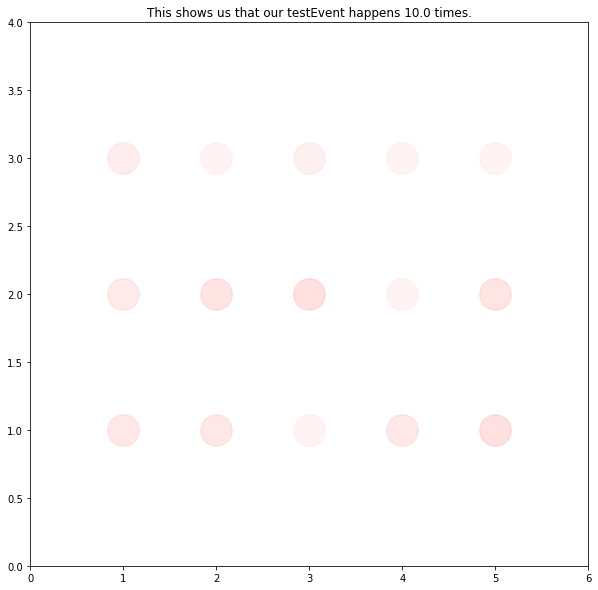

In [13]:
eventOccurances = [i for i in events if (i == testEvent).all()]
plt.scatter(events[:,0], events[:,1] ,s=1000, alpha = 1/eventCount, c = "r")
plt.axis([0,6,0,4])
plt.title(r"This shows us that our testEvent happens %1.1f times." % len(eventOccurances));

In [14]:
# Grabs the X value from our test event and uses it as an index for our Xevents.
columnOccurances = Xevents[int(testEvent[0][0]-1)][1]
columnOccurances
len(eventOccurances)/columnOccurances

19.0

0.5263157894736842

The above gives us the conditional probability, of our event given X.
### Example 6.3
#### Figure 6.3

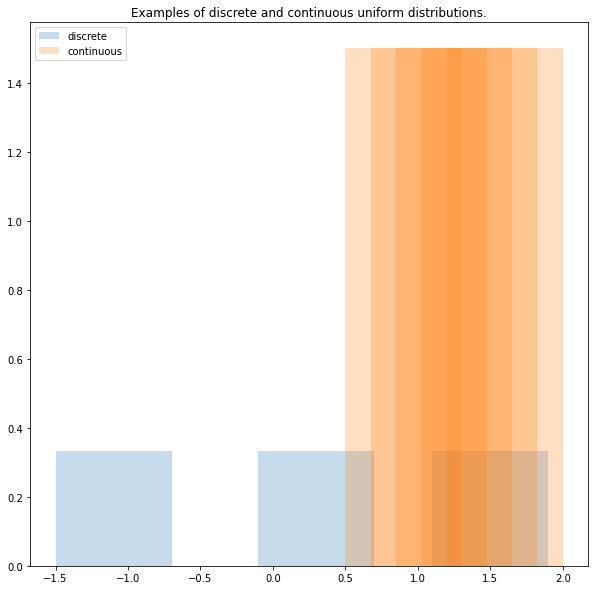

In [15]:
z = [-1.1,.3,1.5]
X = np.linspace(.9,1.6,5)
p = [1/len(z) for i in z]
zp = np.vstack([z,p]).T
plt.bar(zp[:,0],zp[:,1], alpha=.25, label="discrete")
plt.bar(X,np.linspace(1.5,1.5,5), alpha=.25, label = "continuous")
plt.title("Examples of discrete and continuous uniform distributions.")
plt.legend();

Note that although the height of the density for the continuous exceeds 1, the total probability between .9 and 1.6, is still 1. 
## 6.3 Sum Rule, Product rule, and Bayes' Theorem

1. Conditional probability gives $P(A|B) =  \frac{P(A \cap B)}{P(B)}$ and $P(A\cap B) = P(A|B)P(B) = P(A)P(B|A)$. 
2. Total probability gives $P(B) =  \frac{P(A \cap B)}{P(A|B)} = \sum P(A \cap B)  = \sum P(A)P(B|A)$ if B is a subspace of $\sum A$.
3. Bayes gives $P(A|B) = \frac{P(A)P(B|A)}{\sum P(A \cap B)}$.

**Example.**
1. Tournament.
1. Win chance of .3, for group 1, .50 of pop.
2. Win chance of .4, for group 2, .25 of pop.
3. Win chance of .5, for group 3, .25 of pop.
4. Given a win, event B, what is the probability you had group 1, event A?

In [16]:
As = [1,2,3,4]
pA = [.25,.25,.25,.25]

# Bayes: p(a|b) = p(a)*p(b|a) / p(b)
bayes = lambda pa, pba, pbSum: pa*pba/pbSum

allPa = [.5,.25,.25]
allPb = [.3,.4,.5]

# pb = event of winning =  all events of winning regardless of group, summed up 
# pb = sum of all p(a intersection b) = p(a)*p(b|a)
pbSum = np.dot(allPa,allPb)


# p(a) = .5, event of being in group a
# p(b|a) = .3, event of winning, given that group
bayes(allPa[0],allPb[0],pbSum)

0.39999999999999997

## 6.4 Summary Statistics and Independence
1. **Definition 6.3 (Expected Value).** The expected value is calculated by multiplying each of the possible outcomes by the likelihood each outcome will occur and then summing all of those values.
1. **Definition 6.4 (Mean).** The sum of values divided by the number of values. Expected value and mean are often used interchangeably. 
1. Median: middle value. More robust to outliers than the mean.
1. Mode: most frequent value. For a continuous random variable, it is the peak of the density plot.

### Example 6.4
This example is constructed with a Gaussian distribution, or a multivariate normal distribution, which as input takes a mean vector, and a covariance matrix, and outputs a dataset. Note that the addition in the provided equation is a concatenation.

In [17]:
mean1 = np.array([10,2])
mean2 = np.array([0,0])
cov1 = np.vstack([[1,0],[0,1]])
cov2 = np.vstack([[1.7,2.],[2.,8.4]]) # Note, diagonals flipped from book to match figure shape.
Matrix(mean1)
Matrix(cov1)
Matrix(mean2)
Matrix(cov2)

Matrix([
[10],
[ 2]])

Matrix([
[1, 0],
[0, 1]])

Matrix([
[0],
[0]])

Matrix([
[1.7, 2.0],
[2.0, 8.4]])

In [18]:
n = 3000
first = np.round(np.random.multivariate_normal(mean1, cov1, int(n/4))*.4,3) # n/4 to adjust distribution to book figure for countour plot.
second = np.round(np.random.multivariate_normal(mean2, cov2, n)*.6,3)
data = np.vstack([first,second])
np.shape(data)
Matrix(data[:5])

(3750, 2)

Matrix([
[3.924, 0.486],
[3.675, 0.268],
[4.447, 0.955],
[3.644, 1.672],
[4.493, 0.358]])

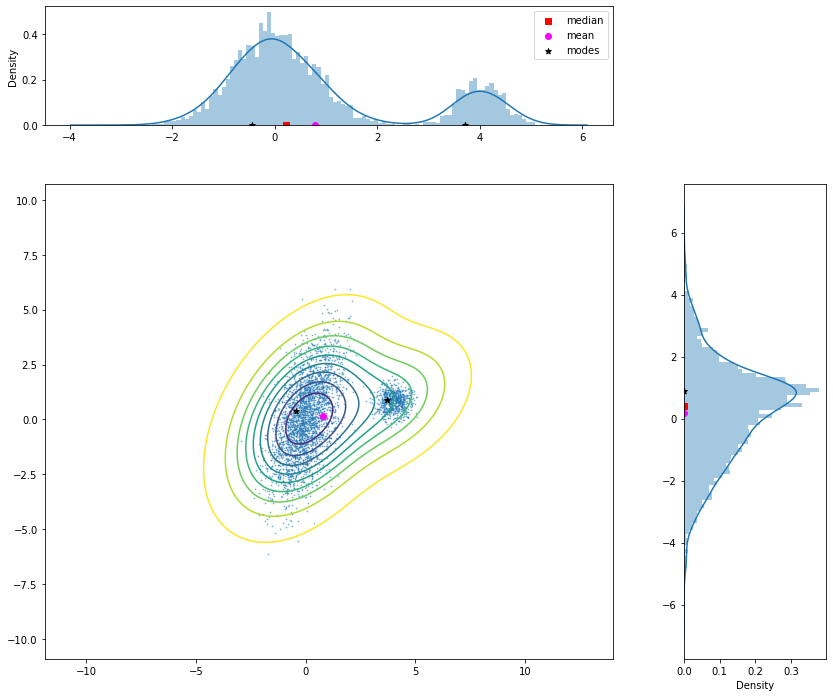

In [19]:
# Figure setup.
fig = plt.figure(figsize=(14, 12))
gs = gridspec.GridSpec(2, 2, width_ratios=[4, 1], height_ratios=[1, 4])
ax1 = fig.add_subplot(gs[0])
ax3 = fig.add_subplot(gs[2])
ax3.axis('equal')
ax4 = fig.add_subplot(gs[3])
bins = 100
# Figure setup.

# Central scatter plot.
ax3.scatter(data[:,0],data[:,1], s = .5, alpha = .5)
sns.kdeplot(data[:,0], data[:,1],n_levels=10, cmap="viridis_r", ax = ax3, bw = 1)
ax3.scatter(np.mean(data[:,0]),np.mean(data[:,1]), marker = "o", color = "magenta")
ax3.scatter(max(set(first[:,0]), key=list(first[:,0]).count), max(set(first[:,1]), key=list(first[:,1]).count), marker = "*", c = "k")
ax3.scatter(max(set(second[:,0]), key=list(second[:,0]).count), max(set(second[:,1]), key=list(second[:,1]).count), marker = "*", c = "k")
# Central scatter plot.

# X distribution.
sns.distplot(data[:,0], ax = ax1, bins = bins)
ax1.scatter(np.median(data[:,0]),0, label = "median", marker = "s", c = "r")
ax1.scatter(np.mean(data[:,0]), 0, label = "mean", marker = "o", c = "magenta")
ax1.scatter(max(set(first[:,0]), key=list(first[:,0]).count),0, label = "modes", marker = "*", c = "k")
ax1.scatter(max(set(second[:,0]), key=list(second[:,0]).count),0, label="_nolegend_", marker = "*", c = "k")
ax1.legend()
# X distribution.

# Y distribution.
sns.distplot(data[:,1], ax = ax4, vertical = True, bins = bins)
ax4.scatter(0,max(set(first[:,1]), key=list(first[:,1]).count), marker = "*", c = "k")
ax4.scatter(0,max(set(second[:,1]), key=list(second[:,1]).count), marker = "*", c = "k")
ax4.scatter(0, np.mean(data[:,1]), marker = "o", c = "magenta")
ax4.scatter(0,np.median(data[:,1]), marker = "s", c = "r");
# Y distribution.

Note that in the above the mode is not derived from the density plot, a continuous random variable, but rather from the data itself, a discrete random variable. 

1. **Definition 6.5 ((Univariate) Covariance).** For two univariate random variables, X and Y, the covariance is the expected product of their deviations from their respective means.
1. Standard deviation: square root of the variance.  Also, the root-mean-square of a de-meaned vector. 
1. **Definition 6.6 ((Multivariate) Covariance).** The spread of a random variable. Calculated as the expected value of the product of x and y transpose, minus the product of the expected values for each x and y transpose. That is $\mathbb{E}[xy^T] - \mathbb{E}[x]\mathbb{E}[y]^T.$ The diagonals of a covariance are the marginals, and off diagonals are cross-variances. 
1. **Definition 6.7 (Variance).** Covariance of a variable with itself. 
1. **Definition 6.8 (Correlation).** $\frac{Cov[x,y]}{\sqrt{\mathbb{V}[x]\mathbb{V}[y]}} \in [-1,1]$, where $\mathbb{V}$ is variance, and where each random variable is divided by its standard deviation.

#### Figure 6.5 
*Two-dimensional datasets with identical means and variances along each axis (colored lines) but with different covariances.*

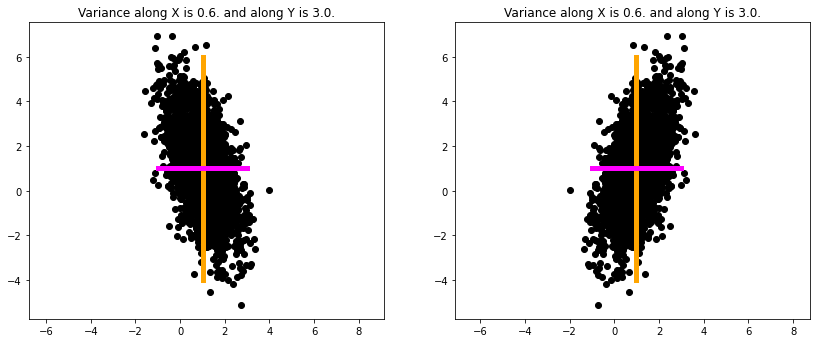

In [20]:
# Data setup.
A = 1+second@np.vstack([[-1,0],[0,1]])
B = 1+second
# Data setup.

# Figure setup.
fig = plt.figure(figsize=(14, 12))
gs = gridspec.GridSpec(2, 2)
ax1 = fig.add_subplot(gs[0])
ax1.axis("equal")
ax2 = fig.add_subplot(gs[1])
ax2.axis("equal")
# Figure setup.

# Left plot.
ax1.scatter(A[:,0],A[:,1], c = "k")
ax1.plot(np.mean(A[:,0])*np.ones(100),np.linspace(-4,6,100), c = "orange", lw = 5)
ax1.plot(np.linspace(-1,3,100),np.mean(A[:,1])*np.ones(100), c = "magenta", lw = 5)
ax1.set_title("Variance along X is %1.1f." %np.var(A[:,0]) + " and along Y is %1.1f." %np.var(A[:,1]))

# Right plot.
ax2.scatter(B[:,0],B[:,1], c = "k")
ax2.plot(np.mean(B[:,0])*np.ones(100),np.linspace(-4,6,100), c = "orange", lw = 5)
ax2.plot(np.linspace(-1,3,100),np.mean(B[:,1])*np.ones(100), c = "magenta", lw = 5)
ax2.set_title("Variance along X is %1.1f." %np.var(B[:,0]) + " and along Y is %1.1f." %np.var(B[:,1]));

Correlation coefficients for A and B are the following.

In [21]:
"A."
Matrix(np.corrcoef(A[:,0],A[:,1]))
"B."
Matrix(np.corrcoef(B[:,0],B[:,1]))

'A.'

Matrix([
[               1.0, -0.528983509956743],
[-0.528983509956743,                1.0]])

'B.'

Matrix([
[              1.0, 0.528983509956743],
[0.528983509956743,               1.0]])

We can contrast `np.corrcoef` with what the book provides to see normalization done by NumPy.

In [22]:
Matrix(np.cov(A[:,0],A[:,1])/np.sqrt(np.var(A[:,0])*np.var(A[:,1])))
Matrix(np.cov(B[:,0],B[:,1])/np.sqrt(np.var(B[:,0])*np.var(B[:,1])))

Matrix([
[0.447899670390801, -0.52915989658894],
[-0.52915989658894,  2.23413203067354]])

Matrix([
[0.447899670390801, 0.52915989658894],
[ 0.52915989658894, 2.23413203067354]])

Positive or negative correlation indicate a converse or inverse relationship. 
1. **Definition 6.9 (Empirical Mean and Covariance).** 
$\bar{x} := \frac{1}{N}\sum^N_{n=1}x_n$. The arithmetic average of the observations for each variable. The empirical covariance is $\frac{1}{N}\sum^N_{n=1}(x_n - \bar{x})(x_n - \bar{x})^T$. The empirical covariance is called a biased estimate, and the unbiased estimate has $N-1$ in the denominator instead of $N$ to account for the current value being calculated.
1. Standard Variance. Squared deviation of a random variable from it's expected value $\mu$.
1. Raw-Score Variance. $V_x[x] = \mathbb{E}_x[x^2] - (\mathbb{E}_x[x])^2$. The mean of the square minus the square of the mean. 
1. Pairwise Difference Variance. $\frac{1}{N^2}\sum^N_{i,j = 1}(x_i - x_j)^2 = 2\left[\frac{1}{N}\sum^N_{i=1}x^2_i - (\frac{1}{N}\sum^N_{i=1}x_i)^2\right]$.

In [23]:
np.mean([(i - np.mean(A[:,0]))**2 for i in A[:,0]])
np.mean(A[:,0]**2)-np.mean(A[:,0])**2
(np.sum(A[:,0]**2) /len(A[:,0]) - (np.sum(A[:,0])/len(A[:,0]))**2) #*2 
np.var(A[:,0])

0.5999761204759999

0.5999761204759995

0.5999761204759995

0.5999761204759999

##### 6.4.4 Sums and Transformations of Random Variables

In [24]:
np.mean(A[:,0] + A[:,1]), np.mean(A[:,0]) + np.mean(A[:,1]) # 6.46
np.mean(A[:,0] - A[:,1]), np.mean(A[:,0]) - np.mean(A[:,1]) # 6.47
np.var(A[:,0] + A[:,1])
np.var(A[:,0]) + np.var(A[:,1]) + np.cov(A[:,0], A[:,1]) + np.cov(A[:,1], A[:,0]) # 6.48
np.var(A[:,0] - A[:,1])
np.var(A[:,0]) + np.var(A[:,1]) - np.cov(A[:,0], A[:,1]) - np.cov(A[:,1], A[:,0]) # 6.49

(2.036135333333333, 2.036135333333333)

(-0.0015713333333333235, -0.001571333333332925)

2.1750147090182224

array([[7.18653468, 2.174542  ],
       [2.174542  , 7.18653468]])

5.010322014244888

array([[-1.19795544e-03,  5.01079472e+00],
       [ 5.01079472e+00, -1.19795544e-03]])

##### 6.4.5 Statistical Independence
**Definition 6.10 (Independence).** Two random variables X,Y are statistically independent iff $p(x,y) = p(x)p(y)$. 

Also, if $P(A|B) = P(A)$, A and B are independent of each other. Which also gives 
$$
P(A\cap B) = P(A|B)P(B) = P(A)P(B|A) = P(A)P(B)
$$

### Example 6.5

In [25]:
tempX = np.random.standard_normal(100000)
np.mean(tempX)
np.mean(tempX**3)
tempY = tempX**2
tempY

-0.0033443258727383594

-0.005742560057389765

array([0.08942397, 2.58680562, 3.2583198 , ..., 0.01203779, 0.10619613,
       1.70404682])

In [26]:
np.cov(tempX,tempY)[1][0]
np.mean(tempX*tempY) - np.mean(tempX)*np.mean(tempY)
np.mean(tempX**3)

-0.0023987374297470406

-0.0023987134423727446

-0.005742560057389765

1. iid. Random variables can be said to be independent and identically distributed, that is, mutually independent random variables where all subsets are independent, and all random variables are from the same distribution.
1. **Definition 6.11 (Conditional Independence).** Two random variables, X and Y, are conditionally independent, $X \perp \!\!\! \perp  Y | Z$ given $Z$, iff $p(x,y|z) = p(x|z)p(y|z)  \forall  z  \in Z$, where Z is the set of states of random variable Z.
#### Figure 6.6

In [27]:
# 6.60
np.sqrt(np.cov(tempX,tempX)) 
np.var(tempX)

array([[0.99992775, 0.99992775],
       [0.99992775, 0.99992775]])

0.9998455107529275

In [28]:
# 6.61
cosAngle = lambda x, y: (np.dot(x.T,y)/np.sqrt(np.dot(np.dot(x.T,x),np.dot(y.T,y))))
angle = lambda cos: np.arccos(cos)*(180/np.pi)
angle(cosAngle(tempX,tempY))
angle((np.cov(tempX,tempY)/np.sqrt(np.var(tempX)*np.var(tempY))))

90.18972994222364

array([[45.11915207, 90.09699476],
       [90.09699476,         nan]])

In [29]:
A = np.sqrt(np.var(tempX)) # Vector magnitudes.
B = np.sqrt(np.var(tempY))
C = np.sqrt(np.var(tempX+tempY)) 
A,B,C
theta = np.arctan(B)/A # Calculating C direction.
theta, angle(theta)
Cvec = np.dot(npl.norm(C),[np.cos(theta),np.sin(theta)])[::-1]
Cvec

(0.9999227523928673, 1.4170684507839566, 1.732954436237556)

(0.9563408433618226, 16.99292656176222)

array([1.41597539, 0.99907196])

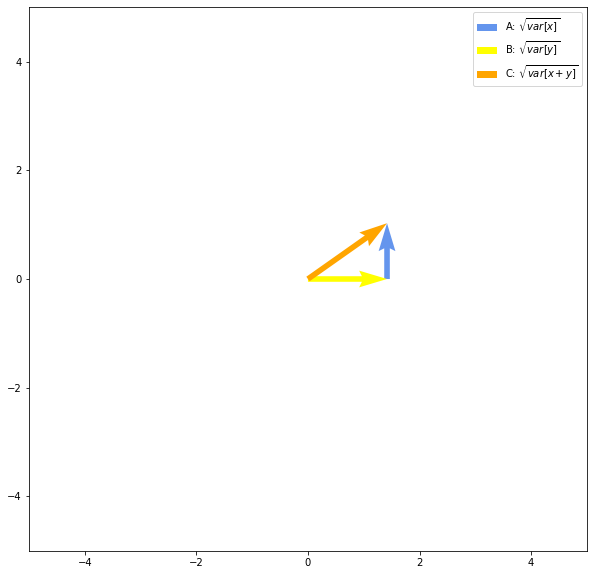

In [30]:
scale = 10
plt.quiver(*[B,0],*[0,A], scale = scale, width = .01,  color = "cornflowerblue", label = r"A: $\sqrt{var[x]}$")
plt.quiver(B,0, scale = scale, width = .01, color = "yellow", label = r"B: $\sqrt{var[y]}$")
plt.quiver(*[0,0],*Cvec, scale = scale, width = .01,  color = "orange", label = r"C: $\sqrt{var[x+y]}$")
plt.axis([-scale/2,scale/2,-scale/2,scale/2])
plt.legend();

*Recall that probability mass, or density, is positive and needs to add up to 1, thus Euclidean distance is not the best way to obtain distances between distributions.*

## 6.5 Gaussian Distribution
#### Figure 6.7. 
#### Figure 6.8 
*Gaussian distributions overlaid with 100 samples.*

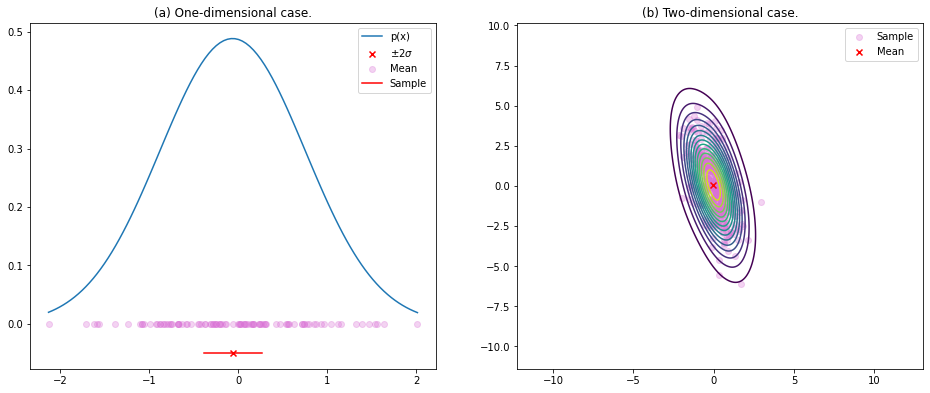

In [31]:
n = 100
# currData = first[:n][:,0] # Toggle to see a density plot with sigmas more similar to the book.
currData = second[:n][:,0]
dataM = np.mean(currData)
dataSTD = np.std(currData)

# Figure setup.
fig = plt.figure(figsize=(16, 14)); gs = gridspec.GridSpec(2, 2)
ax1 = fig.add_subplot(gs[0])#; ax1.axis("equal")
ax2 = fig.add_subplot(gs[1]); ax2.axis("equal")
ax1.set_title("(a) One-dimensional case.")
ax2.set_title("(b) Two-dimensional case.")
# Figure setup.

# First plot.
temp = np.linspace(np.min(currData),np.max(currData),n)
gauss = lambda x,m,t: (1/(np.sqrt(2*np.pi*t**2)))*np.exp(-(x-m)**2/(2*t**2))
gVals = [gauss(x,dataM,dataSTD) for x in temp]
ax1.plot(temp,gVals) # Distribution.
ax1.scatter(np.mean(temp),-.05,marker = "x", c = "r") # Mean.
ax1.scatter(currData,np.zeros(len(currData)), alpha = .3, c = "orchid") # Sample.
ax1.plot(np.linspace(np.mean(temp)-2*np.std(gVals),np.mean(temp)+2*np.std(gVals),10),
            np.linspace(-.05,-.05,10), c = "r") # 2 Sigma.
ax1.legend(["p(x)", r"$\pm 2\sigma$", "Mean","Sample"])

# Second plot.
n = 500
currData = second[:n]@np.vstack([[-1,0],[0,1]])
ax2.scatter(currData[:,0],currData[:,1], c = "orchid", alpha = .3, label = "Sample")
ax2.scatter(np.mean(currData[:,0]), np.mean(currData[:,1]), marker = "x", c = "r", label = "Mean")
sns.kdeplot(currData[:,0], currData[:,1],n_levels=15, cmap="viridis", bw = 1, ax = ax2)
ax2.axis('equal')
ax2.legend();

1. (a) Univariate (one-dimensional) Gaussian; The red cross shows the mean and the red line shows the extent of the variance. 
1. (b) Multivariate (two-dimensional) Gaussian, viewed from top. The red cross shows the mean and the colored lines show the contour lines of the density. 

We can implement a distribution plot one layer of abstraction beneath seaborn with `SciPy.stats` and it's `pdf` function.

In [32]:
# Constructing mean and covariance matrices.
currData = second[:n]@np.vstack([[-1,0],[0,1]])
meanX = np.mean(currData[:,0])
meanY = np.mean(currData[:,1])
mean = np.array([meanX,meanY])
cov = np.cov(currData.T)
mean
cov

array([-0.021602,  0.08494 ])

array([[ 0.5948268 , -0.72442306],
       [-0.72442306,  3.07438418]])

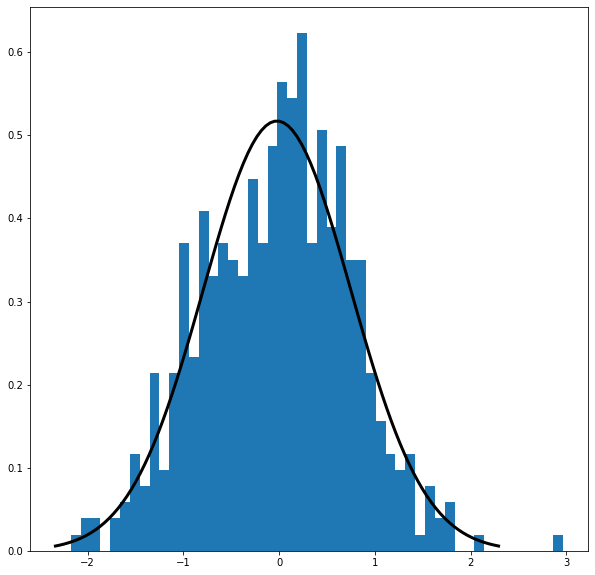

In [33]:
plt.hist(currData[:,0], int(currData[:,0].size/10), density = True)
x = np.linspace(meanX - 3*np.sqrt(cov[:,0][0]), meanX + 3*np.sqrt(cov[:,0][0]), 100)
plt.plot(x,stats.norm.pdf(x,meanX,np.sqrt(cov[:,0][0])), c = "k", lw = 3);

Figure 6.7 *Gaussian distribution of two random variables $x_1$ and $x_2$* follows from the distributions above. 

Given the multivariate Gaussian equation,
$$
p(x|\mu,\sigma^2) = \frac{e^{\frac{1}{2}(x-\mu)^T\Sigma^{-1}(x-\mu)}}{\sqrt{(2\pi)^D |\Sigma|}}
$$
we can implement the following.

In [34]:
def multivarGauss(pos, m, S):
    '''
    pos is a matrix of np.meshgrids for our data.
    m is a mean matrix.
    S is a covariance matrix.
    
    An einstein sum is called to perform the (x-m)^T@Sigma^(-1)(x-mu) part.
    See: https://docs.scipy.org/doc/numpy/reference/generated/numpy.einsum.html for details.
    '''
    D = np.shape(m)[0]
    Sdeterminant = npl.det(S)
    Den = np.sqrt((2*np.pi)**D*Sdeterminant)
    
    Sinv = npl.inv(S)
    exp = np.einsum('...k,kl,...l->...', pos-m, Sinv, pos-m) 
    return np.exp((-1/2)*exp) / Den

# Constructing 3D density data.
scale3D = 7
linspace = np.linspace(-scale3D,scale3D,n) 
X,Y = np.meshgrid(linspace,linspace)
pos = np.empty(X.shape+(2,))
pos[:,:,0] = X
pos[:,:,1] = Y
Z = multivarGauss(pos,mean,cov)
np.shape(Z)

(500, 500)

TypeError: plot() missing 1 required positional argument: 'ys'

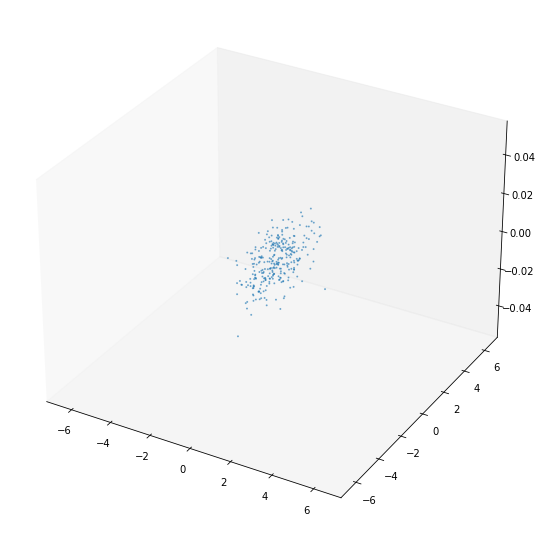

In [37]:
# Figure setup.
fig = plt.figure(figsize = (15,16), tight_layout = True)
gs = GridSpec(2, 2)
ax = fig.add_subplot(gs[1,0], projection='3d')
ax.set_xlim3d(-scale3D,scale3D); ax.set_ylim3d(-scale3D,scale3D); ax.grid(b=None)
n = 300
# Figure setup.

# Scatter and contour plot.
ax.scatter(currData[:n][:,0],currData[:n][:,1],np.zeros(n), alpha = .5, s = 1)
sns.kdeplot(currData[:,0], currData[:,1],n_levels=15, cmap="viridis", bw = 1)
ax.scatter(np.mean(currData[:,0]), np.mean(currData[:,1]), marker = "x", c = "r") # Mean.
# Scatter and contour plot.

# Distributions on walls.
x = np.linspace(meanX - 3*np.sqrt(cov[:,0][0]), meanX + 3*np.sqrt(cov[:,0][0]), 100)
ax.plot(x,np.ones(x.size)*scale3D,stats.norm.pdf(x,meanX,np.sqrt(cov[:,0][0])), c = "k", lw = .5);
x = np.linspace(meanY - 3*np.sqrt(cov[:,1][1]), meanY + 3*np.sqrt(cov[:,1][1]), 100)
ax.plot(np.ones(x.size)*-scale3D,x,stats.norm.pdf(x,meanY,np.sqrt(cov[:,1][1])), c = "k", lw = .5);
# Distributions on walls.

# Histograms on walls.
# *Built using bar plots for 3D projection.
hist, bins = np.histogram(currData[:n][:,1], density = True, bins = 40) 
xs = (bins[:-1] + bins[1:])/2
ax.bar(xs,hist,zs = -scale3D, zdir = "x", width = .001, color = "k", ec = "k", alpha = .3)
hist, bins = np.histogram(currData[:n][:,0], density = True, bins = 40)
xs = (bins[:-1] + bins[1:])/2
ax.bar(xs,hist,zs = scale3D, zdir = "y", width = .001, color = "k", ec = "k", alpha = .3);
# Histograms on walls.

# Scatter and surface plot.
ax = fig.add_subplot(gs[0,:], projection='3d')
ax.set_xlabel(r"$x_1$"); ax.set_ylabel(r"$x_2$"); ax.set_zlabel(r"$p(x_1,x_2)$")
ax.set_xlim3d(-scale3D,scale3D); ax.set_ylim3d(-scale3D,scale3D); ax.grid(b=None)
ax.scatter(currData[:n][:,0],currData[:n][:,1],np.zeros(n), alpha = .5, s = 1)
ax.plot_wireframe(X, Y, Z, color = 'grey') ;  
ax.scatter(np.mean(currData[:,0]), np.mean(currData[:,1]), marker = "x", c = "r") # Mean.
# Scatter and surface plot.

# Scatter plot, mean, surface plot.
ax = fig.add_subplot(gs[1,1], projection='3d')
ax.set_xlim3d(-scale3D,scale3D); ax.set_ylim3d(-scale3D,scale3D); ax.grid(b=None)
ax.scatter(currData[:n][:,0],currData[:n][:,1],np.zeros(n), alpha = .5, s = 1)
ax.contour3D(X,Y,Z, levels = 100, alpha = .2)
ax.scatter(np.mean(currData[:,0]), np.mean(currData[:,1]), marker = "x", c = "r"); # Mean.
# Scatter plot, mean, surface plot.

The contours on the bottom left are normalized in contrast with the distributions of the samples on the walls.
##### 6.5.1 Marginals and Conditionals of Gaussians are Gaussians

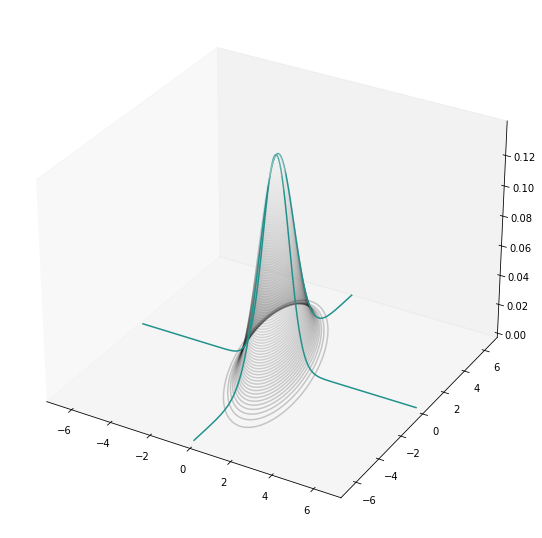

In [57]:
# Contours along x and y axis.
fig = plt.figure(figsize = (15,16), tight_layout = True)
ax = fig.add_subplot(gs[1,0], projection='3d')
# ax = fig.add_subplot(gs[1,0])
scale3D = 7
ax.set_xlim3d(-scale3D,scale3D); ax.set_ylim3d(-scale3D,scale3D); ax.grid(b=None)

ax.contour3D(X,Y,Z, levels = 100, alpha = .2, cmap = "binary_r")
ax.contour(X,Y,Z, levels = 1, zdir='x')
ax.contour(X,Y,Z, levels = 1, zdir='y');
# ax.contour(X,Y,Z, levels = 10);

The above represents the conditional probabilities for $p( X | Y = 0)$ and $p(Y | X = 0)$. 

The book emphasizes that these slices, and the distributions the slices come from, are all Gaussian distributions. That is, both the marginal, and conditional distributions of a Gaussian distribution, will be Gaussian themselves. Which we can intuit from the slicing visualization above. 

The formal conditional probability is the following.
$$
p(x|y) = N(\mu_{x|y},\Sigma_{x|y}) \\
\mu_{x|y} = \mu_x + \Sigma_{xy}\Sigma^{-1}_{yy}(y-\mu_y) \\
\Sigma_{x|y} = \Sigma_{xx} - \Sigma_{xy}\Sigma_{yy}^{-1}\Sigma_{yx}
$$

Note that the covariance of a variable with itself, is the variance of that variable. Thus, the inverse of the covariance of a variable with itself, is the inverse of the variance, which is simply placing the variance at the denominator of 1. 

In [88]:
_var=np.var(currData[:,0])
_cov=np.cov(currData[:,0],currData[:,0])

# np.linalg.inv(np.cov(currData[:,1],currData[:,1])**-1)
# np.linalg.inv(np.cov(currData[:,1],currData[:,1])[0,0])

_var
_cov
_var**-1
np.linalg.inv(_cov)

#niezbytto sie sprawdzilo...


0.593637143596

array([[0.5948268, 0.5948268],
       [0.5948268, 0.5948268]])

1.6845307117112445

array([[ 9.00719925e+15, -9.00719925e+15],
       [-9.00719925e+15,  9.00719925e+15]])

**The above is intentionally left in.**

In [89]:
np.var(currData[:,1])**-1

0.3259202332592441

In [90]:
# 6.66
muXgivenY = lambda X,Y,ypoint: np.mean(X) + np.cov(X,Y)*np.var(Y)**-1*(ypoint-np.mean(Y))
muXgivenY(currData[:,0],currData[:,1],0)

array([[-0.03806899, -0.00154731],
       [-0.00154731, -0.10671222]])

In [91]:
# 6.67
covXgivenY = lambda X,Y: np.cov(X,X) - np.cov(X,Y)*np.var(Y)**-1*np.cov(Y,X)
covXgivenY(currData[:,0],currData[:,1])

array([[-0.00119204,  0.42378752],
       [ 0.42378752, -0.00119204]])

$\mu(X|Y,y_n)=\mathbb{E}(X)+\frac{cov(X,Y)}{var(Y)}(y_n-\mathbb{E}(Y)) $
<br>
$cov(X|Y)=cov(X,X)-\frac{cov(X,Y)}{var(Y)} $

### Example 6.6
#### Figure 6.9
*(a) Bivariate Gaussian;  <br>(b) marginal of a joint Gaussian distribution is Gaussian; <br>(c) the conditional distribution of a Gaussian is also Gaussian.*

In [93]:
mean = np.array([0,2])
cov = np.vstack([[.3,-1.],[-1.,5.]])
Matrix(mean)
Matrix(cov)

Matrix([
[0],
[2]])

Matrix([
[ 0.3, -1.0],
[-1.0,  5.0]])

From here we can use multivarGauss implemented above. 
```python
def multivarGauss(pos, m, S):
    D = np.shape(m)[0]
    Sdeterminant = npl.det(S)
    Den = np.sqrt((2*np.pi)**D*Sdeterminant)
    
    Sinv = npl.inv(S)
    exp = np.einsum('...k,kl,...l->...', pos-m, Sinv, pos-m) 
    return np.exp((-1/2)*exp) / Den
```

In [ ]:
# Constructing 3D density data.
scale3D = 7
linspace = np.linspace(-scale3D,scale3D,n) 
X,Y = np.meshgrid(linspace,linspace)
pos = np.empty(X.shape+(2,))
pos[:,:,0] = X
pos[:,:,1] = Y
Z = multivarGauss(pos,mean,cov)
np.shape(Z)

(300, 300)

As well as 6.66, 6.67. 
$$
p(x|y) = N(\mu_{x|y},\Sigma_{x|y}) \\
\mu_{x|y} = \mu_x + \Sigma_{xy}\Sigma^{-1}_{yy}(y-\mu_y) \\
\Sigma_{x|y} = \Sigma_{xx} - \Sigma_{xy}\Sigma_{yy}^{-1}\Sigma_{yx}
$$

In [ ]:
Matrix(mean)
Matrix(cov)

Matrix([
[0],
[2]])

Matrix([
[ 0.3, -1.0],
[-1.0,  5.0]])

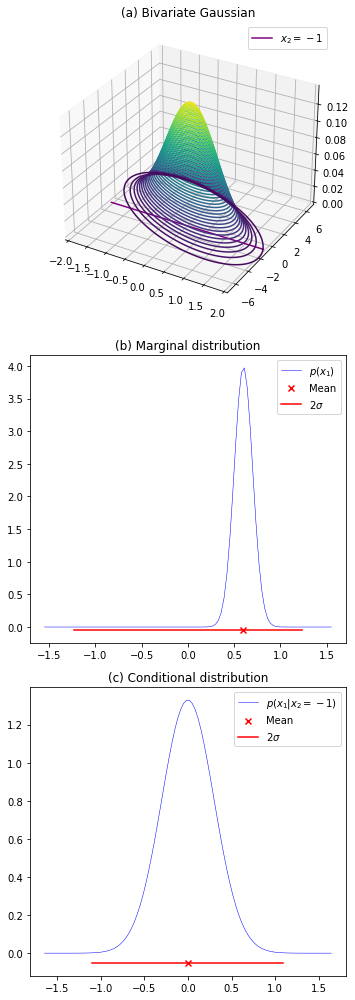

In [97]:
# Figure setup.
fig = plt.figure(figsize = (5,14), tight_layout = True)
gs = gridspec.GridSpec(2, 2)
# ax = fig.add_subplot(3,1,1)
ax = fig.add_subplot(3,1,1,projection='3d')
ax.set_title("(a) Bivariate Gaussian")
n = 300
# Figure setup.

# Contour plot.
# ax.contour(X,Y,Z)
ax.contour3D(X,Y,Z,levels=50)
ax.plot(np.linspace(-2,2,10),np.linspace(-1,-1,10),c = 'purple', label = r"$x_2 = -1$")
ax.set_xlim(-2,2); ax.set_ylim(-scale3D,scale3D)
ax.legend()
# Contour plot.

# Scatter and surface plot.
mu = .6
var = .1
x = np.linspace(-(mu+np.sqrt(var)*3),mu+np.sqrt(var)*3, 100)
ys = stats.norm.pdf(x,mu,var)

ax = fig.add_subplot(3,1,2)
ax.plot(x,ys, c = "b", lw = .5)
ax.scatter(mu, -0.05, marker = "x", c = "r") # Mean.
ax.plot(np.linspace(-(mu+np.sqrt(var)*2),mu+np.sqrt(var)*2,10),
            np.linspace(-.05,-.05,10), c = "r") # 2 Sigma.
ax.set_title("(b) Marginal distribution")
ax.legend([r"$p(x_1)$","Mean",r"$2\sigma$"])
# Scatter and surface plot.

# Scatter plot, mean, surface plot.
mu = 0
var = .3
x = np.linspace(mu-np.sqrt(var)*3, mu+np.sqrt(var)*3, 100)
ys = stats.norm.pdf(x,mu,var)

ax = fig.add_subplot(3,1,3)
ax.plot(x,ys, c = "b", lw = .5)
ax.scatter(mu, -0.05, marker = "x", c = "r") # Mean.
ax.plot(np.linspace(-(mu+np.sqrt(var)*2),(mu+np.sqrt(var)*2),10),
            np.linspace(-.05,-.05,10), c = "r") # 2 Sigma.
ax.set_title("(c) Conditional distribution")
ax.legend([r"$p(x_1|x_2=-1)$","Mean",r"$2\sigma$"]);
# Scatter plot, mean, surface plot.

*w obliczeniach nic tu nie widze*

## 6.6 Conjugacy and the Exponential Family
### Example 6.8 (Bernoulli Distribution)
Bernoulli Distribution: want to model probability of "head" when coin flipping.
1. $p(x|\mu) = \mu^x(1-\mu)^{1-x}$
1. $\mathbb{E}[x] = \mu, \mathbb{V}[x] = \mu(1-\mu)$

### Example 6.9 (Binomial Distribution)
Binomial Distribution: want to model probability of "head" over "N" amount of coin flips, if the probability for observing a head is $\mu$.
1. $p(m|N,\mu) = {N\choose m}\mu^m(1-\mu)^{N-m}$
1. $\mathbb{E}[m] = N\mu, \mathbb{V}[m] = N\mu(1-\mu)$

NameError: name 'binom' is not defined

In [121]:
from scipy.stats import binom

In [122]:
means = np.vstack([.1,.4,.75])
N = 15
N
Matrix(means)

15

Matrix([
[ 0.1],
[ 0.4],
[0.75]])

In [123]:
binom.ppf(0.01,N,means[0])


array([0.])

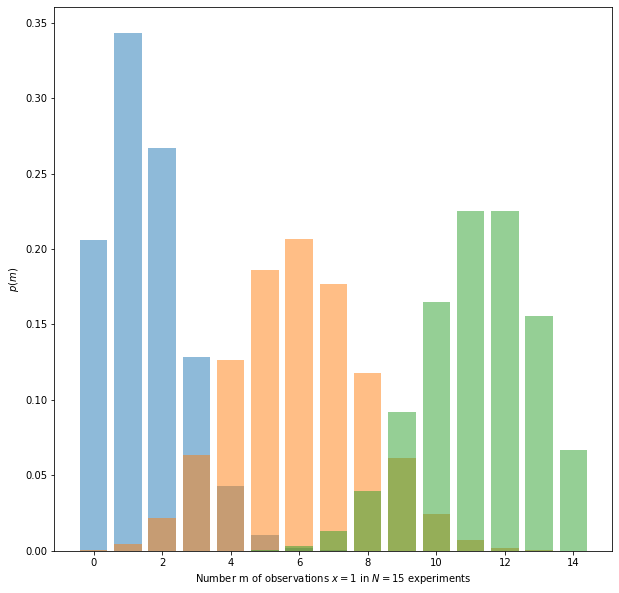

In [124]:
x = np.arange(binom.ppf(.01,N,means[0]),
              binom.ppf(.99,N,means[2]))
[plt.bar(x,binom.pmf(x,N,means[i]), alpha = .5) for i in range(0,3)]
plt.xlabel(r"Number m of observations $x=1$ in $N = 15$ experiments")
plt.ylabel(r"$p(m)$");

### Example 6.10 (Beta Distribution)
Beta Distribution: want to model a continuous random variable on a finite interval. 
1. $\Gamma(t) := \int^\infty_0 x^{t-1}exp(-x)dx$
1. $p(\mu | \alpha,\beta) = \frac{\Gamma(\alpha+\beta)}{\Gamma(\alpha)\Gamma(\beta)}\mu^{\alpha-1}(1-\mu)^{\beta-1}$
1. $\mathbb{E}[\mu] = \frac{\alpha}{\alpha+\beta}, \mathbb{V}[\mu] = \frac{\alpha\beta}{(\alpha+\beta)^2(\alpha+\beta+1)}$

In [125]:
from scipy.stats import beta

In [126]:
alphas = np.vstack([.5,1,2,4,5])
betas = np.vstack([.5,1,.3,10,1])
ab = np.hstack([alphas,betas])
Matrix(ab)

Matrix([
[0.5,  0.5],
[1.0,  1.0],
[2.0,  0.3],
[4.0, 10.0],
[5.0,  1.0]])

In [127]:
beta.pdf(xs,ab[0][0],ab[0][1])

array([       inf, 3.18326126, 2.26247848, 1.8569024 , 1.61656631,
       1.45357148, 1.33403807, 1.2417735 , 1.16793758, 1.10724267,
       1.05630739, 1.01285586, 0.97529292, 0.94246324, 0.91350692,
       0.88776915, 0.86474147, 0.84402233, 0.82528996, 0.80828315,
       0.79278747, 0.77862505, 0.76564706, 0.75372793, 0.74276096,
       0.7326549 , 0.72333123, 0.71472207, 0.70676841, 0.6994188 ,
       0.69262817, 0.68635692, 0.6805702 , 0.67523724, 0.67033082,
       0.66582686, 0.66170406, 0.65794352, 0.65452857, 0.65144446,
       0.64867823, 0.64621851, 0.64405543, 0.64218045, 0.64058629,
       0.63926685, 0.63821715, 0.63743326, 0.63691227, 0.63665225,
       0.63665225, 0.63691227, 0.63743326, 0.63821715, 0.63926685,
       0.64058629, 0.64218045, 0.64405543, 0.64621851, 0.64867823,
       0.65144446, 0.65452857, 0.65794352, 0.66170406, 0.66582686,
       0.67033082, 0.67523724, 0.6805702 , 0.68635692, 0.69262817,
       0.6994188 , 0.70676841, 0.71472207, 0.72333123, 0.73265

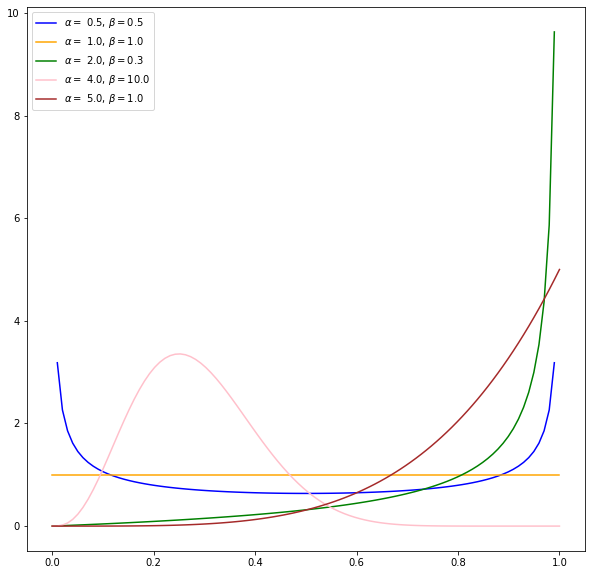

In [128]:
xs = np.linspace(0,1,100)
colors = ["b","orange","g","pink","brown"]
for ind,i in enumerate(ab):
    plt.plot(xs,beta.pdf(xs,i[0],i[1]), c = colors[ind], label = r"$\alpha =$ %1.1f, " %i[0] + r"$\beta = %1.1f.$" %i[1])
plt.legend();

### Example 6.11 (Beta-Binomial Conjugacy)
Beta-Binomial: want to see "h" heads in "N" coin flips. Or, the probability of successes that follows a beta distribution.

Given a binomially distributed probability for a variable, $x$, for which x represents the number of heads in N coin flips. Given that $\mu$ is the probability of a head. Run the above beta distribution (2) above, on $\mu$. Then the updated $\mu$ is the following

$$
p(\mu|x = h, N, \alpha, \beta) = \mu^{h+\alpha-1}(1-\mu)^{(N-h) + \beta - 1}
$$

*Credit to this <a href="https://stackoverflow.com/questions/55126055/efficient-sampling-from-beta-binomial-distribution-in-python" >SO</a> and this<a href="https://en.wikipedia.org/wiki/Beta-binomial_distribution" > wiki</a> for guidance.*

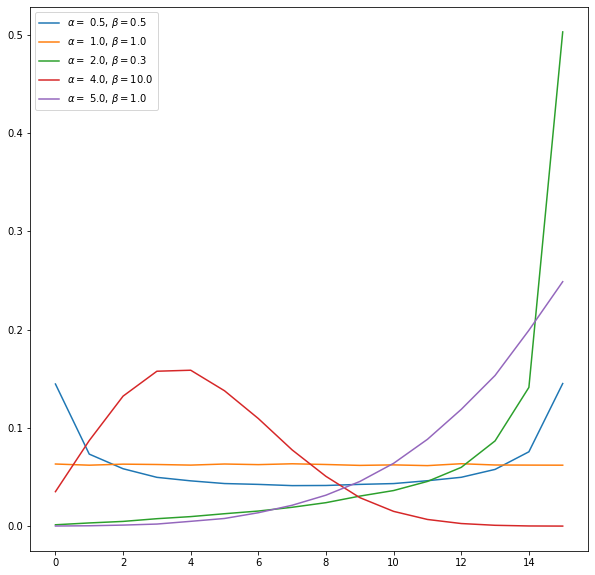

In [129]:
def betabinom(a, b, n, size=None):
    p = np.random.beta(a, b, size=size)
    r = np.random.binomial(n, p)

    return r

N = 15
n = 100000

for i in ab:
    q = betabinom(i[0], i[1], N, size=n)
    # Building histogram heights.
    h = np.zeros(N+1, dtype=np.float64) 
    for v in q: 
        h[v] += 1.0
    h /= np.float64(n) 
    # Building histogram heights.
    plt.plot(np.linspace(0,N,len(h)), h, label = r"$\alpha =$ %1.1f, " %i[0] + r"$\beta = %1.1f.$" %i[1])
plt.legend();

### Example 6.12 (Beta-Bernoulli Conjugacy)
We can also use Beta as a prior for the Bernoulli, where we have a random variable $x\in\{0,1\}$ and a distribution $\theta \in [0,1]$ where $p(x=1|\theta) = \theta$, and $\theta$ is Beta distributed.

##### 6.6.2 Sufficient Statistics
##### 6.6.3 Exponential Family
The following are provided in the book as a re-expression of the above in more convenient terms using sufficient statistics and the exponential family form. Sufficient statistics are statistic measures that are sufficient to completely describe the distribution. The exponential family distribution form is $p(x|\theta) \propto exp(\theta_1x + \theta_2x^2)$.

### Example 6.13 (Gaussian as Exponential Family)
### Example 6.14 (Bernoulli as Exponential Family)

### Example 6.15
*Book derives the Beta distribution by looking at the canonical conjugate prior of the Bernoulli distribution in exponential family form.*

## 6.7 Change of Variables/Inverse Transform
### Example 6.16 
*Distribution Function Technique*

In [141]:
%reset
x = Symbol('x')
f = 3*x**2
fLam = lambdify('x',f)
f

Nothing done.


3*x**2

Calculate `pdf` of $Y=X^2$, see book for analytical process. 

In [134]:
y = Symbol('y')
Fy = y**(3/2)
FyLam = lambdify('y',Fy)
Fy

y**1.5

In [135]:
diff(Fy)

1.5*y**0.5

### Example 6.17
*Change of Variables Technique*